# Fake News Detection Project

## 1. Introduction

This project is all about fighting fake news by building a system that can automatically tell if a news article is real or fake. In today's world of social media and online news, it's becoming harder to know what to believe.

To address this problem, we have built a machine learning model that uses natural language processing techniques to analyse the content of news articles and determine their credibility. We trained our model on a large dataset of labeled news articles, which we carefully curated to include examples of both real and fake news.

Our model uses a variety of features, such as the text, title and the length of the article to make its classification decision. We also experimented with different machine learning algorithms and techniques, such as PyTorch, to improve the accuracy and robustness of our system.

## 2. Data Loading and Initial Exploration



### 2.1 Loading the Data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
fake_df = pd.read_csv('data/Fake.csv')
true_df = pd.read_csv('data/True.csv')

fake_df['label'] = 0  # 0 for fake
true_df['label'] = 1  # 1 for true

df = pd.concat([fake_df, true_df], ignore_index=True)

### 2.2 Initial Data Overview

In [3]:
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


title      0
text       0
subject    0
date       0
label      0
dtype: int64

We have a clean dataset with no missing values and the expected columns.

### 2.3 Exploratory Data Analysis

#### 2.3.1 Class Distribution
Our dataset contains 44,898 articles in total, with:
- 23,481 fake news articles (52.3%)
- 21,417 real news articles (47.7%)

This shows that our dataset is relatively balanced, with a slight skew towards fake news articles. This balance is beneficial for training machine learning models as it reduces the risk of class bias.


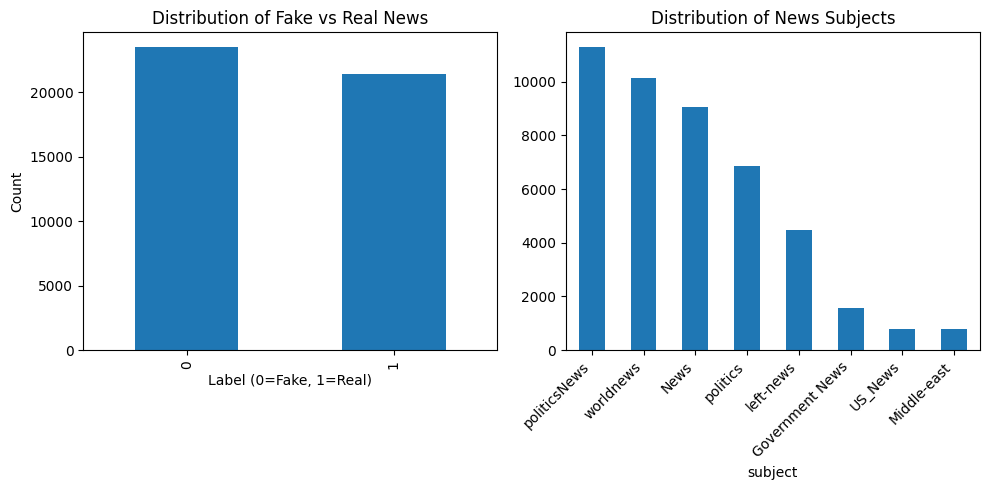

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Fake vs Real News')
plt.xlabel('Label (0=Fake, 1=Real)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['subject'].value_counts().plot(kind='bar')
plt.title('Distribution of News Subjects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2.3.2 Subject Analysis
The news articles are distributed across 8 different subjects:
1. Politics News (11,272 articles) - Most common
2. World News (10,145 articles)
3. News (9,050 articles)
4. Politics (6,841 articles)
5. Left News (4,459 articles)
6. Government News (1,570 articles)
7. US News (783 articles)
8. Middle East (778 articles) - Least common

Key observations:
- Political news dominates the dataset, with "politicsNews" being the most frequent category
- There's a clear imbalance in subject distribution
- Interestingly, some subjects appear exclusively in either fake or real news:
  - "worldnews" and "politicsNews" categories contain only real news
  - "News", "left-news", and several other categories contain primarily fake news
- This strong correlation between subject and label could be both beneficial and problematic for our model

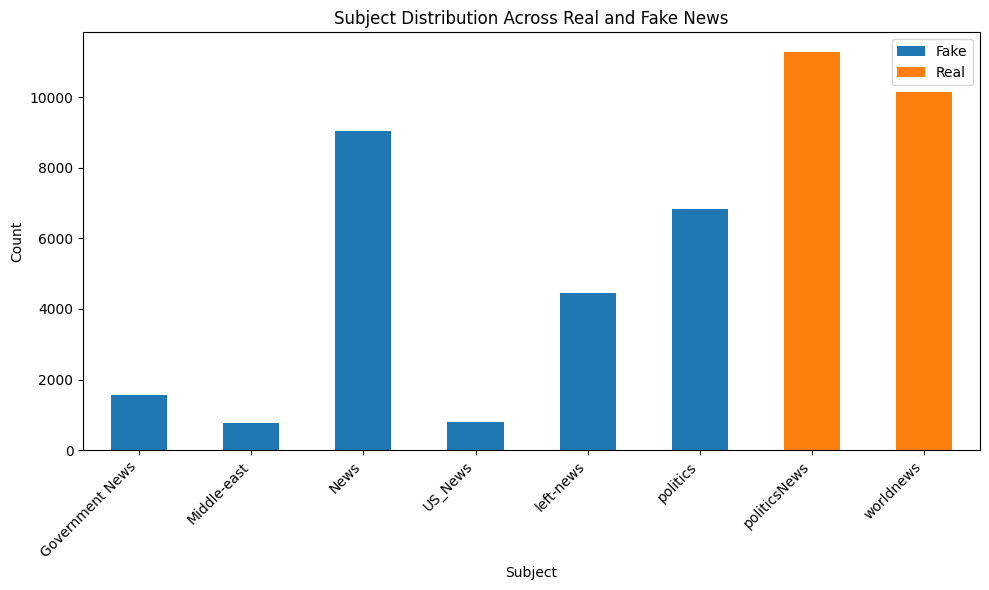

In [5]:
subject_label_dist = pd.crosstab(df['subject'], df['label'])
subject_label_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Subject Distribution Across Real and Fake News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.legend(['Fake', 'Real'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2.3.3 Text Length Analysis
Analysis of text length distributions reveals:

Title Length:
- Fake news articles tend to have longer titles (median ~85 characters)
- Real news articles have shorter titles (median ~60 characters)
- Both categories show some extreme outliers
- The difference in title length could be a useful feature for classification

Article Text Length:
- Both real and fake news show similar text length distributions
- Most articles fall within a similar length range
- Both categories have significant outliers
- Text length alone might not be a strong discriminator between fake and real news

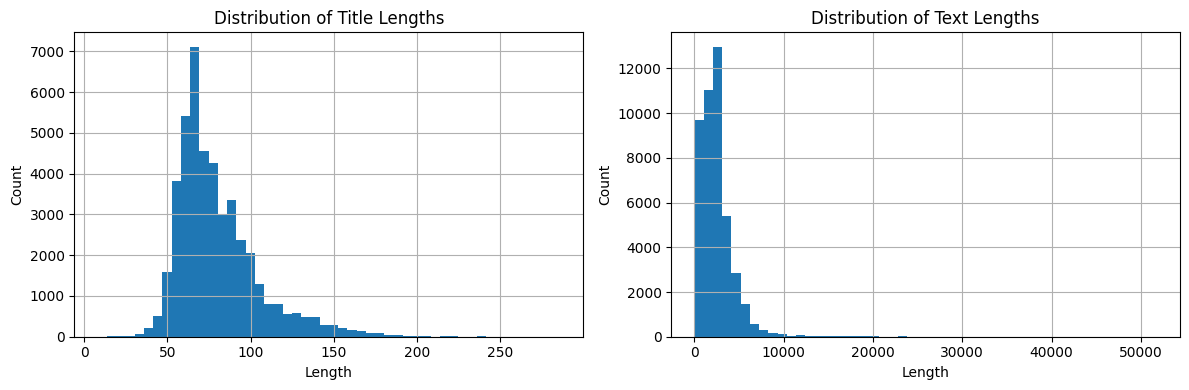

In [6]:
# Visualize text length distributions
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['title'].str.len().hist(bins=50)
plt.title('Distribution of Title Lengths')
plt.xlabel('Length')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['text'].str.len().hist(bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

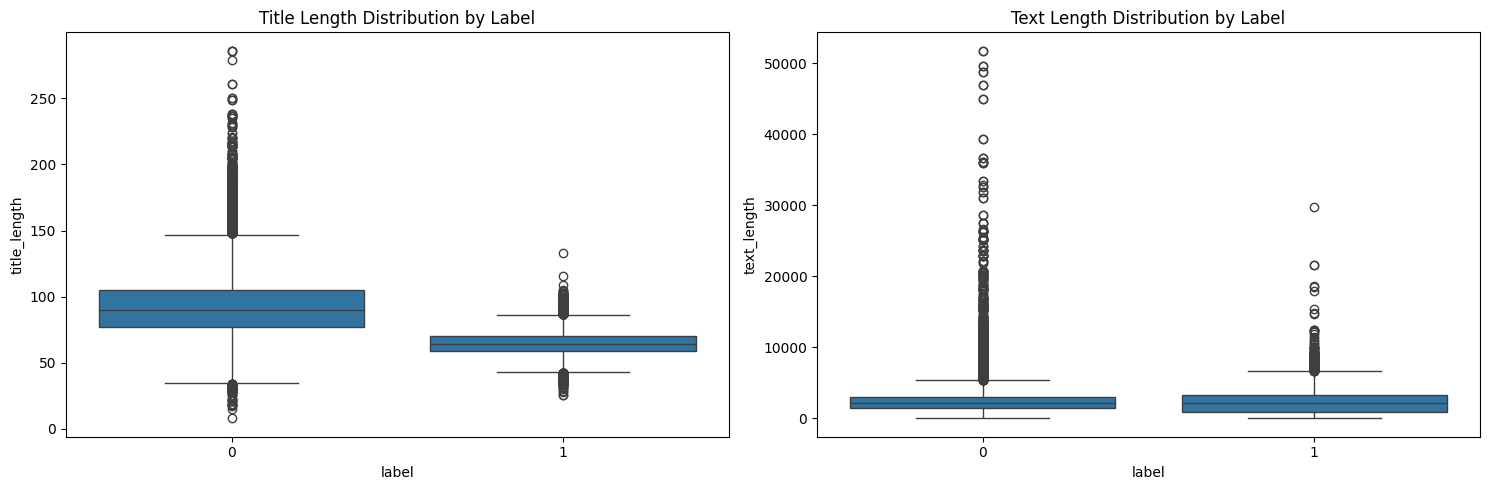

In [7]:
df['title_length'] = df['title'].str.len()
df['text_length'] = df['text'].str.len()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='label', y='title_length', data=df)
plt.title('Title Length Distribution by Label')

plt.subplot(1, 2, 2)
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Length Distribution by Label')
plt.tight_layout()
plt.show()

#### 2.3.4 Basic Statistics & Example Texts from both Classes

In [8]:
print("\nBasic Statistics:")
print("\nSubject Distribution:")
print(df['subject'].value_counts())
print("\nLabel Distribution:")
print(df['label'].value_counts())


Basic Statistics:

Subject Distribution:
subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

Label Distribution:
label
0    23481
1    21417
Name: count, dtype: int64


In [9]:
print("Example of a REAL news article:")
print("Title:", df[df['label']==1]['title'].iloc[0])
print("\nText:", df[df['label']==1]['text'].iloc[0][:500], "...\n")

print("\nExample of a FAKE news article:")
print("Title:", df[df['label']==0]['title'].iloc[0])
print("\nText:", df[df['label']==0]['text'].iloc[0][:500], "...")

Example of a REAL news article:
Title: As U.S. budget fight looms, Republicans flip their fiscal script

Text: WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they retur ...


Example of a FAKE news article:
Title:  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing

Text: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do

#### 2.3.5 Key Findings from EDA
1. Dataset Balance: The nearly balanced nature of our dataset (52.3% fake vs 47.7% real) is advantageous for model training.

2. Subject Correlation: Strong correlation between subject and label suggests that the subject field could be a powerful feature, but we should be cautious about overfitting to this attribute.

3. Text Characteristics:
   - Fake news tends to have longer, potentially more sensational titles
   - The main text length is not significantly different between classes
   - Example articles show distinct writing styles between fake and real news

4. Potential Features for Modeling:
   - Article subject
   - Title length
   - Text stylometric features
   - Sentiment and emotional content (based on example articles)
   - Language patterns and complexity

#### 2.3.6 Next Steps
Based on our EDA, we should focus on:
1. Feature engineering using text characteristics
2. Careful handling of the subject category to avoid overfitting
3. Developing features that capture writing style differences
4. Creating a robust validation strategy that ensures our model generalizes across subjects